<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/cnn_vs_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
)

from keras import Model
from keras.models import Sequential

from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.optimizers import AdamW, RMSprop

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
inputs = tf.keras.Input(shape=(32, 32, 3))

# Block 1
x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 2
x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 3
x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

# Classifier
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.45)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = Model(inputs, outputs)


In [4]:
optimizer = AdamW(learning_rate=0.0005)

model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)

early_stop = EarlyStopping(
    patience=3,
    restore_best_weights=True,
    monitor="val_accuracy",
    min_delta=0.001,
)

In [5]:
history = model.fit(
    train_images,
    train_labels,
    validation_split=0.2,
    epochs=25,
    batch_size=128,
    callbacks=[lr_scheduler, early_stop],
    verbose=1,
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.2941 - loss: 2.3982 - val_accuracy: 0.0979 - val_loss: 6.4715 - learning_rate: 5.0000e-04
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.4918 - loss: 1.4851 - val_accuracy: 0.2814 - val_loss: 2.6816 - learning_rate: 5.0000e-04
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.5762 - loss: 1.2142 - val_accuracy: 0.6022 - val_loss: 1.1371 - learning_rate: 5.0000e-04
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.6278 - loss: 1.0512 - val_accuracy: 0.6534 - val_loss: 1.0009 - learning_rate: 5.0000e-04
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.6718 - loss: 0.9341 - val_accuracy: 0.6624 - val_loss: 0.9572 - learning_rate: 5.0000e-04
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.7056 - loss: 0.8541 - val_accuracy: 0.5533 - val_loss: 1.4712 - learning_rate: 5.0000e-04
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - acc

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f"CNN Test Accuracy: {test_acc:.4f}")

CNN Test Accuracy: 0.7917


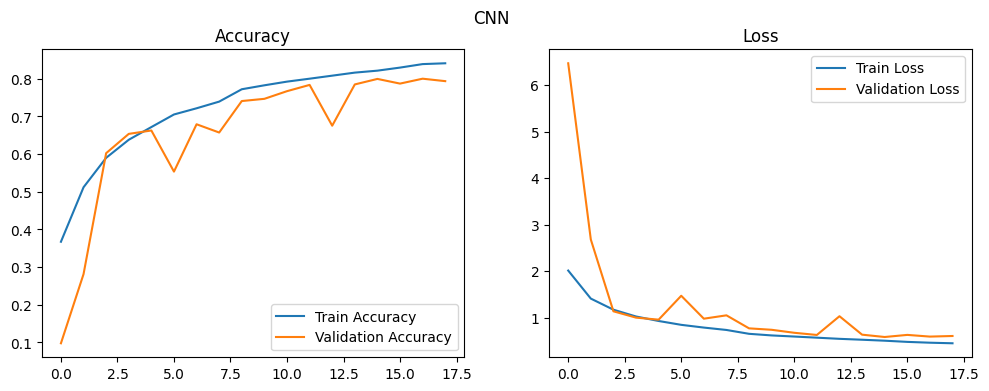

In [8]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history, "CNN")

# **CIFAR-10: Fine-tuning ResNet50 using Transfer Learning**

In [1]:
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
)

from keras import Model
from keras.models import Sequential

from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.optimizers import AdamW, RMSprop

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
base_model = ResNet50(
    include_top=False, weights="imagenet"
)

# We freeze all but the last layers, so only the last layer's weights are trainable
for layer in base_model.layers[:143]:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
model = Sequential(
    [
        layers.Lambda(lambda image: tf.image.resize(image, (224, 224))),
        base_model,
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer=RMSprop(0.00002), loss="categorical_crossentropy", metrics=["accuracy"])

lr_schedule = (
    ReduceLROnPlateau(
        patience=1, factor=0.5, min_lr=1e-6, monitor="val_accuracy", verbose=1
    ),
)

es = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True
)

In [5]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    callbacks=[es, lr_schedule],
    validation_split=0.2,
    verbose=1,
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 211s 148ms/step - accuracy: 0.2490 - loss: 2.3006 - val_accuracy: 0.8597 - val_loss: 0.7521 - learning_rate: 2.0000e-05
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 173s 136ms/step - accuracy: 0.5381 - loss: 1.3942 - val_accuracy: 0.9028 - val_loss: 0.5125 - learning_rate: 2.0000e-05
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 218s 149ms/step - accuracy: 0.6847 - loss: 1.0538 - val_accuracy: 0.9209 - val_loss: 0.3876 - learning_rate: 2.0000e-05
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 185s 135ms/step - accuracy: 0.7708 - loss: 0.8347 - val_accuracy: 0.9307 - val_loss: 0.3135 - learning_rate: 2.0000e-05
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 135ms/step - accuracy: 0.8320 - loss: 0.6765 - val_accuracy: 0.9370 - val_loss: 0.2708 - learning_rate: 2.0000e-05



Final Test Accuracy: 0.9370


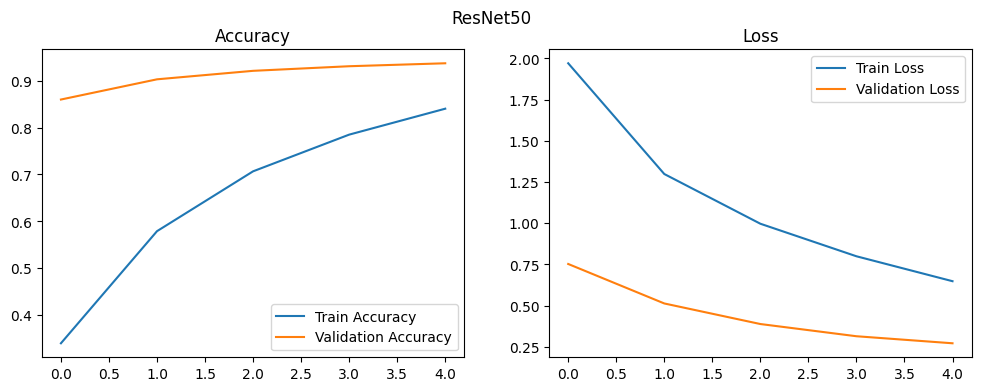

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()


plot_history(history, "ResNet50")